In [2]:
import os, coda
import numpy as np
import matplotlib.pyplot as plt

In [3]:
alldata = {}
for filename in os.listdir('vcds'):
    with open('vcds/'+filename) as file:
        print('reading '+filename)
        compound = filename.split('.')[0].split('_')[1] + '_' +filename.split('.')[0].split('_')[2]
        vcd = []
        t = []
        temp = []
        lat = []
        lon = []
        linenum = 0
        for line in file.readlines():
            data = [float(x) for x in line.strip().split()]
            if linenum%6 == 1:
                vcd.append(data)
            elif linenum%6 == 2:
                t.append(data)
            elif linenum%6 == 3:
                temp.append(data)
            elif linenum%6 == 4:
                lat.append(data)
            elif linenum%6 == 5:
                lon.append(data)
            linenum += 1
        vcd_arr = np.hstack(vcd)
        t_arr = np.hstack(t)
        temp_arr = np.hstack(temp)
        lat_arr = np.hstack(lat)
        lon_arr = np.hstack(lon)
        try:
            stacked = np.vstack([vcd_arr, t_arr, temp_arr, lat_arr, lon_arr])
        except ValueError:
            minLen = len(vcd_arr)
            for arr in [t_arr, temp_arr, lat_arr, lon_arr]:
                if len(arr) < minLen:
                    minLen = len(arr)
            stacked = np.vstack([vcd_arr[:minLen], t_arr[:minLen], temp_arr[:minLen], lat_arr[:minLen], lon_arr[:minLen]])
        if compound in alldata:
            alldata[compound] = np.append(alldata[compound], stacked, axis=1)
        else:
            alldata[compound] = stacked

reading nad_ir1_ch4.txt
reading nad_ir1_ch4_2.txt
reading nad_ir1_ch4_3.txt
reading nad_ir1_ch4_4.txt
reading nad_ir1_ch4_5.txt
reading nad_ir3_co.txt
reading nad_ir3_co_2.txt
reading nad_ir3_co_3.txt
reading nad_ir3_co_4.txt
reading nad_ir3_co_5.txt
reading nad_uv0_o3.txt
reading nad_uv0_o3_2.txt
reading nad_uv0_o3_3.txt
reading nad_uv0_o3_4.txt
reading nad_uv0_o3_5.txt
reading nad_uv1_no2.txt
reading nad_uv1_no2_2.txt
reading nad_uv1_no2_3.txt
reading nad_uv1_no2_4.txt
reading nad_uv1_no2_5.txt
reading nad_uv3_bro.txt
reading nad_uv3_bro_2.txt
reading nad_uv3_bro_3.txt
reading nad_uv3_bro_4.txt
reading nad_uv3_bro_5.txt
reading nad_uv4_h2co.txt
reading nad_uv4_h2co_2.txt
reading nad_uv4_h2co_3.txt
reading nad_uv4_h2co_4.txt
reading nad_uv4_h2co_5.txt
reading nad_uv5_so2.txt
reading nad_uv5_so2_2.txt
reading nad_uv5_so2_3.txt
reading nad_uv5_so2_4.txt
reading nad_uv5_so2_5.txt
reading nad_uv6_oclo.txt
reading nad_uv6_oclo_2.txt
reading nad_uv6_oclo_3.txt
reading nad_uv6_oclo_4.txt
rea

In [4]:
alldata.keys()

dict_keys(['ir1_ch4', 'ir3_co', 'uv0_o3', 'uv1_no2', 'uv3_bro', 'uv4_h2co', 'uv5_so2', 'uv6_oclo', 'uv7_so2', 'uv8_h2o', 'uv9_chocho'])

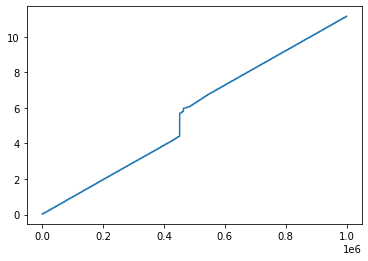

In [11]:
alltimes = np.array([])
alltemps = np.array([])
for key in alldata.keys():
    alltimes = np.hstack([alltimes, alldata[key][1]])
    alltemps = np.hstack([alltemps, alldata[key][2]])
plt.plot(alltimes[:1000000]/3600/24-366-365*3)

In [18]:
idxs = np.where(alltimes/3600/24-366-365*3 > 0)
print(alltimes[np.argmin((alltimes/3600/24-366-365*3)[idxs])])

126233279.223772


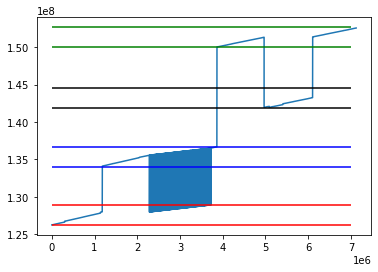

In [36]:
plt.plot(alldata['uv0_o3'][1])
plt.hlines(126233279, 0, 7e6, color='r')
plt.hlines(126233279+2678400, 0, 7e6, color='r')

plt.hlines(126233279+7776000, 0, 7e6, color='b')
plt.hlines(126233279+10368000, 0, 7e6, color='b')

plt.hlines(126233279+15638400, 0, 7e6, color='k')
plt.hlines(126233279+18316800, 0, 7e6, color='k')

plt.hlines(126233279+23760030, 0, 7e6, color='g')
plt.hlines(126233279+26438430, 0, 7e6, color='g')

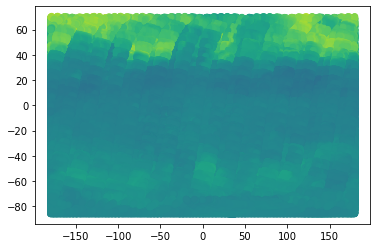

In [19]:
jan_idxs = np.where((alldata['uv0_o3'][0]>0) & (alldata['uv0_o3'][1]>126233279)
                    & (alldata['uv0_o3'][1]<126233279+2678400))
plt.scatter(alldata['uv0_o3'][-1][jan_idxs], alldata['uv0_o3'][-2][jan_idxs], c=alldata['uv0_o3'][0][jan_idxs])

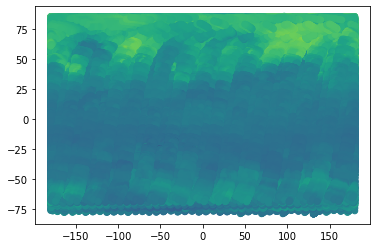

In [37]:
apr_idxs = np.where((alldata['uv0_o3'][0]>0) & (alldata['uv0_o3'][1]>126233279+7776000)
                    & (alldata['uv0_o3'][1]<126233279+10368000))
plt.scatter(alldata['uv0_o3'][-1][apr_idxs], alldata['uv0_o3'][-2][apr_idxs], c=alldata['uv0_o3'][0][apr_idxs])

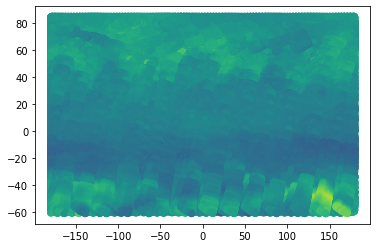

In [38]:
jul_idxs = np.where((alldata['uv0_o3'][0]>0) & (alldata['uv0_o3'][1]>126233279+15638400)
                    & (alldata['uv0_o3'][1]<126233279+18316800))
plt.scatter(alldata['uv0_o3'][-1][jul_idxs], alldata['uv0_o3'][-2][jul_idxs], c=alldata['uv0_o3'][0][jul_idxs])

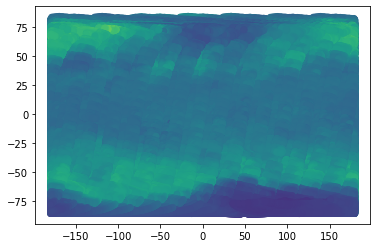

In [39]:
oct_idxs = np.where((alldata['uv0_o3'][0]>0) & (alldata['uv0_o3'][1]>126233279+23760030)
                    & (alldata['uv0_o3'][1]<126233279+26438430))
plt.scatter(alldata['uv0_o3'][-1][oct_idxs], alldata['uv0_o3'][-2][oct_idxs], c=alldata['uv0_o3'][0][oct_idxs])

In [41]:
list(alldata.keys())

['ir1_ch4',
 'ir3_co',
 'uv0_o3',
 'uv1_no2',
 'uv3_bro',
 'uv4_h2co',
 'uv5_so2',
 'uv6_oclo',
 'uv7_so2',
 'uv8_h2o',
 'uv9_chocho']

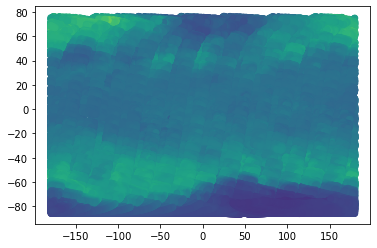

In [76]:
oct_idxs = np.where((alldata['uv0_o3'][0]>0) & (alldata['uv0_o3'][1]>126233279+23760030+669600*3)
                    & (alldata['uv0_o3'][1]<126233279+23760030+669600*4))
plt.scatter(alldata['uv0_o3'][-1][oct_idxs], alldata['uv0_o3'][-2][oct_idxs], c=alldata['uv0_o3'][0][oct_idxs])

In [43]:
latbin_centers = np.linspace(-90, 90, 32)
lonbin_centers = np.linspace(-180, 180, 64)
jan_data_binned = {}
for gas in alldata.keys():
    print(gas)
    jan_data_binned[gas] = np.zeros((32, 64))
    jan_idxs = np.where((alldata[gas][0]>0) & (alldata[gas][1]>126233279) & (alldata[gas][1]<126233279+2678400))
    print(f'\t{len(alldata[gas][0][jan_idxs])}')
    for i in range(len(alldata[gas][0][jan_idxs])):
        if i%10000 == 0:
            print(f'\t\t{i}')
        latbin_idx = np.argmin(np.abs(alldata[gas][-2][jan_idxs][i] - latbin_centers))
        lonbin_idx = np.argmin(np.abs(alldata[gas][-1][jan_idxs][i] - lonbin_centers))
        jan_data_binned[gas][latbin_idx][lonbin_idx] += alldata[gas][0][jan_idxs][i]
    jan_data_binned[gas] /= len(alldata[gas][0][jan_idxs])

ir1_ch4
	2743462
		0


KeyboardInterrupt: 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform

In [ ]:
from sklearn.preprocessing import StandardScaler
features = list(alldata.keys())
scaler = StandardScaler()

for gas in alldata.keys():
    jan_idxs = np.where((alldata[gas][0]>0) & (alldata[gas][1]>126233279) & (alldata[gas][1]<126233279+2678400))
    